<a href="https://colab.research.google.com/github/valentingracia/codingDojoDC/blob/main/MnistVanilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Red Neuronal Convolucional Mnist



In [103]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [104]:
# Obtener datos: ya está dividido en conjuntos de entrenamiento y prueba
#(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [105]:
#minist2
mnist=pd.read_csv("/content/drive/MyDrive/Coding Dojo/MNIST/fashion-mnist_train.csv")

mnist2.head(2)
X=mnist2.drop(columns=["label"])
y=mnist2["label"]
(X_train, X_test,y_train,y_test)=train_test_split(X,y,random_state=1)

In [106]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
type(X_train)

numpy.ndarray

In [107]:
X_train.shape

(45000, 784)

In [108]:
# Escalar datos entre 0 y 1
X_train = X_train / 255
X_test = X_test / 255


In [109]:
# Reformar datos
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [110]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [111]:
# Paso 1: Definir nuestra estructura de red
# Guardar la forma de entrada
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [112]:
# Modelo secuencial
model = Sequential()

In [113]:
# Capa convolucional
model.add(Conv2D(filters = 8, # Cuantos filtros quieres usar
                 kernel_size = 3, # tamaño de cada filtro
                 input_shape = input_shape)) # ¿Cuál es la forma de tus características de entrada (definimos esto arriba)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Tamaño de pooling
# Capa de aplanamiento
model.add(Flatten())
# Capa de salida
model.add(Dense(10, # Cuantas posibilidades de salida tenemos
                activation = 'softmax')) # ¿Qué función de activación estás usando?

In [114]:
# Paso 2: compilar
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [115]:
# Paso 3: ajustar nuestro modelo
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

Epoch 1/20
1407/1407 [==============================] - 16s 11ms/step - loss: 0.5498 - acc: 0.8084 - val_loss: 0.4487 - val_acc: 0.8410
Epoch 2/20
1407/1407 [==============================] - 15s 11ms/step - loss: 0.4031 - acc: 0.8602 - val_loss: 0.4010 - val_acc: 0.8609
Epoch 3/20
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3665 - acc: 0.8729 - val_loss: 0.3607 - val_acc: 0.8761
Epoch 4/20
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3450 - acc: 0.8774 - val_loss: 0.3576 - val_acc: 0.8766
Epoch 5/20
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3281 - acc: 0.8850 - val_loss: 0.3579 - val_acc: 0.8759
Epoch 6/20
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3155 - acc: 0.8896 - val_loss: 0.3423 - val_acc: 0.8815
Epoch 7/20
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3058 - acc: 0.8933 - val_loss: 0.3660 - val_acc: 0.8736
Epoch 8/20
1407/1407 [==========================

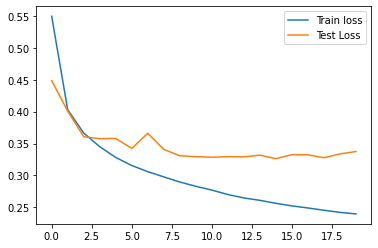

In [116]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

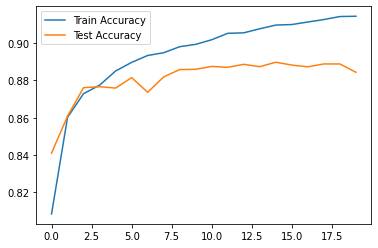

In [117]:
# Visualizar la precisión
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();